In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import scipy
from scipy import stats
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import copy


%load_ext autoreload
%autoreload 2

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()



In [2]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)



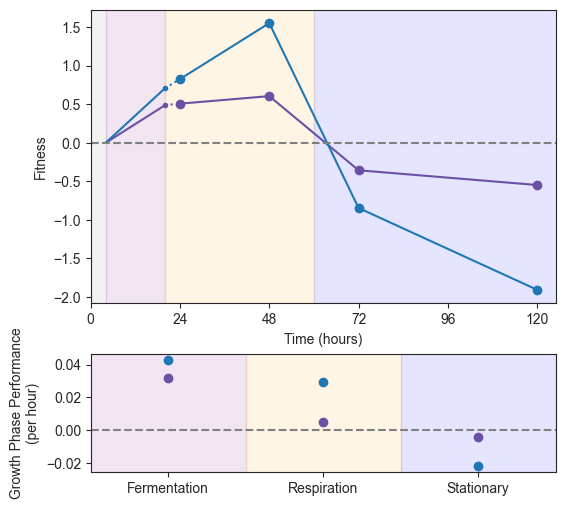

In [85]:
fig,ax = plt.subplots(figsize=(6,6),gridspec_kw={'height_ratios': [2.5, 1],'hspace':0.25},nrows=2)

conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness',
              'Fit3D_early_fitness','Fit5D_early_fitness']

plt.sca(ax[0])
for anc in ['TOR1','IRA1_NON']:
    
    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

    plt.plot([24*d for d in [1,2,3,5]],background_mutant[conditions].values[0],marker='o',color=tools.anc_color_map[anc])
    
    plt.plot([20,24],
             [background_mutant['Fit1D_both2%5%_fitness'].values[0]-4*background_mutant['ResPerHour'].values[0],background_mutant['Fit1D_both2%5%_fitness'].values[0]],
             marker='.',linestyle=':',color=tools.anc_color_map[anc])
    
    plt.plot([4,20],[0,background_mutant['Fit1D_both2%5%_fitness'].values[0]-4*background_mutant['ResPerHour'].values[0]],
             linestyle='-',color=tools.anc_color_map[anc])
    
#     if anc == 'IRA1_NON':
#         avg = (background_mutant['Fit1D_both2%5%_fitness'].values[0]+background_mutant['Fit2D_early_fitness'].values[0])/2
#         plt.annotate(r'Resp = $\frac{2Day-1Day}{24}$', xy=(24, avg), xytext=(24, avg), xycoords='data',
#             ha='right', va='center',
#             bbox=dict(boxstyle='square', fc='white'),
#             arrowprops=dict(arrowstyle=f'-[, widthB={avg*2}, lengthB=0.5', lw=2.0))
    
    
plt.axvspan(0,4,color='gray',alpha=0.1)
plt.axvspan(4,20,color='purple',alpha=0.1)
plt.axvspan(20,60,color='orange',alpha=0.1)
plt.axvspan(60,150,color='blue',alpha=0.1)



plt.axhline(0,color='gray',linestyle='--')

plt.xlim(0,125)
plt.ylabel('Fitness')
plt.xlabel('Time (hours)')
plt.xticks([24*d for d in range(6)],[24*d for d in range(6)])

plt.sca(ax[1])
plt.axvspan(-0.5,0.5,color='purple',alpha=0.1)
plt.axvspan(0.5,1.5,color='orange',alpha=0.1)
plt.axvspan(1.5,2.5,color='blue',alpha=0.1)
for anc in ['TOR1','IRA1_NON']:
    
    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

    plt.scatter(range(3),background_mutant[['FerPerHour','ResPerHour','StaPerHour']].values[0],
             marker='o',color=tools.anc_color_map[anc])
    

    
plt.ylabel('Growth Phase Performance\n(per hour)')
plt.xticks(range(3),['Fermentation','Respiration','Stationary'],rotation=0)
plt.axhline(0,color='gray',linestyle='--')
plt.xlim(-0.5,2.5)

plt.savefig(f'{home_dir}/figures/main_text/figure3_performance_calculations_vertstack.pdf',bbox_inches='tight')


In [7]:
background_mutant[['Fit1D_both2%5%_fitness','Fit2D_early_fitness',
                                                            'Fit3D_early_fitness','Fit5D_early_fitness']].values

array([[ 0.55852318,  1.17484645,  0.56167977, -0.13543161]])